the date is about Whether a first date will lead to a relationship.

where there are 192 columns which describe the two partners we need to map these features to predict if there would be a relationship or not

but the challenges is that the data has a lot of  missing data and one of them was income column which I think is very important because having a high or low income affect your chance to be in a relationship.
the dimension of the data is high so it is difficult to see the correlation between columns or visualize them as a whole  

the ideal solution for me is to imput all the columns that have missing values but if the column has less than hlaf of the total values it will affect the model generalization 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
df.shape

(5909, 192)

In [5]:
df.columns

Index(['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1',
       'order', 'partner', 'pid',
       ...
       'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3',
       'intel5_3', 'fun5_3', 'amb5_3', 'id'],
      dtype='object', length=192)

In [6]:
# shape of dataset
df.shape

(5909, 192)

In [7]:
test.shape

(2469, 191)

In [8]:
# show information about columns 
test.iloc[:,:64].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    2469 non-null   int64  
 1   idg       2469 non-null   int64  
 2   condtn    2469 non-null   int64  
 3   wave      2469 non-null   int64  
 4   round     2469 non-null   int64  
 5   position  2469 non-null   int64  
 6   positin1  1941 non-null   float64
 7   order     2469 non-null   int64  
 8   partner   2469 non-null   int64  
 9   pid       2467 non-null   float64
 10  int_corr  2420 non-null   float64
 11  samerace  2469 non-null   int64  
 12  age_o     2430 non-null   float64
 13  race_o    2444 non-null   float64
 14  pf_o_att  2439 non-null   float64
 15  pf_o_sin  2439 non-null   float64
 16  pf_o_int  2439 non-null   float64
 17  pf_o_fun  2437 non-null   float64
 18  pf_o_amb  2435 non-null   float64
 19  pf_o_sha  2423 non-null   float64
 20  attr_o    2410 non-null   floa

In [9]:
df.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


In [10]:
df.iloc[:,0:64].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    5909 non-null   int64  
 1   idg       5909 non-null   int64  
 2   condtn    5909 non-null   int64  
 3   wave      5909 non-null   int64  
 4   round     5909 non-null   int64  
 5   position  5909 non-null   int64  
 6   positin1  4591 non-null   float64
 7   order     5909 non-null   int64  
 8   partner   5909 non-null   int64  
 9   pid       5901 non-null   float64
 10  match     5909 non-null   int64  
 11  int_corr  5800 non-null   float64
 12  samerace  5909 non-null   int64  
 13  age_o     5844 non-null   float64
 14  race_o    5861 non-null   float64
 15  pf_o_att  5850 non-null   float64
 16  pf_o_sin  5850 non-null   float64
 17  pf_o_int  5850 non-null   float64
 18  pf_o_fun  5843 non-null   float64
 19  pf_o_amb  5836 non-null   float64
 20  pf_o_sha  5826 non-null   floa

In [11]:
df.iloc[:,64:129].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   exphappy  5839 non-null   float64
 1   expnum    1282 non-null   float64
 2   attr1_1   5851 non-null   float64
 3   sinc1_1   5851 non-null   float64
 4   intel1_1  5851 non-null   float64
 5   fun1_1    5844 non-null   float64
 6   amb1_1    5838 non-null   float64
 7   shar1_1   5821 non-null   float64
 8   attr4_1   4563 non-null   float64
 9   sinc4_1   4563 non-null   float64
 10  intel4_1  4563 non-null   float64
 11  fun4_1    4563 non-null   float64
 12  amb4_1    4563 non-null   float64
 13  shar4_1   4546 non-null   float64
 14  attr2_1   5851 non-null   float64
 15  sinc2_1   5851 non-null   float64
 16  intel2_1  5851 non-null   float64
 17  fun2_1    5851 non-null   float64
 18  amb2_1    5844 non-null   float64
 19  shar2_1   5844 non-null   float64
 20  attr3_1   5828 non-null   floa

In [12]:
df.iloc[:,129:193].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 63 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   shar1_2   5262 non-null   float64
 1   attr4_2   4063 non-null   float64
 2   sinc4_2   4063 non-null   float64
 3   intel4_2  4063 non-null   float64
 4   fun4_2    4063 non-null   float64
 5   amb4_2    4063 non-null   float64
 6   shar4_2   4063 non-null   float64
 7   attr2_2   4063 non-null   float64
 8   sinc2_2   4063 non-null   float64
 9   intel2_2  4063 non-null   float64
 10  fun2_2    4063 non-null   float64
 11  amb2_2    4063 non-null   float64
 12  shar2_2   4063 non-null   float64
 13  attr3_2   5262 non-null   float64
 14  sinc3_2   5262 non-null   float64
 15  intel3_2  5262 non-null   float64
 16  fun3_2    5262 non-null   float64
 17  amb3_2    5262 non-null   float64
 18  attr5_2   3088 non-null   float64
 19  sinc5_2   3088 non-null   float64
 20  intel5_2  3088 non-null   floa

In [13]:
df.isnull().sum()

gender         0
idg            0
condtn         0
wave           0
round          0
            ... 
sinc5_3     4496
intel5_3    4496
fun5_3      4496
amb5_3      4496
id             0
Length: 192, dtype: int64

drop columns with a lot of missing values, around half of the values are missing 

In [14]:
df.drop(['attr7_2', 'sinc7_2', 'shar7_2', 'amb7_2', 'fun7_2', 'intel7_2','attr1_s', 'expnum', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s',
'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s' ,'amb3_s', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr5_2', 'sinc5_2',
'intel5_2', 'fun5_2','amb5_2' ,'you_call', 'them_cal', 'date_3','numdat_3', 'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3',
 'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3','shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3',
'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3',   'amb3_3', 'attr5_3', 'sinc5_3',
 'intel5_3', 'fun5_3', 'amb5_3', 'undergra', 'mn_sat', 'tuition', 'income', 'positin1'], axis = 1, inplace = True)

In [15]:
test.drop(['attr7_2', 'sinc7_2', 'shar7_2', 'amb7_2', 'fun7_2', 'intel7_2',
         'attr1_s', 'expnum', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s',
         'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s' ,
         'amb3_s', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1'], axis=1, inplace=True)

In [16]:
test.drop(['attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2','amb5_2' ,'you_call', 'them_cal', 'date_3','numdat_3', 
'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr7_3', 'sinc7_3', 
'intel7_3', 'fun7_3', 'amb7_3','shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3',
'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3',   
'amb3_3', 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3', 'undergra', 'mn_sat', 'tuition', 'income', 'positin1'], axis = 1, inplace = True)

drop redundent column as career_c represent the same values as career

In [17]:
# drop career columns
df.drop('career', axis=1, inplace=True)
test.drop('career', axis=1, inplace=True)

In [18]:
df.iloc[:,0:50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 50 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    5909 non-null   int64  
 1   idg       5909 non-null   int64  
 2   condtn    5909 non-null   int64  
 3   wave      5909 non-null   int64  
 4   round     5909 non-null   int64  
 5   position  5909 non-null   int64  
 6   order     5909 non-null   int64  
 7   partner   5909 non-null   int64  
 8   pid       5901 non-null   float64
 9   match     5909 non-null   int64  
 10  int_corr  5800 non-null   float64
 11  samerace  5909 non-null   int64  
 12  age_o     5844 non-null   float64
 13  race_o    5861 non-null   float64
 14  pf_o_att  5850 non-null   float64
 15  pf_o_sin  5850 non-null   float64
 16  pf_o_int  5850 non-null   float64
 17  pf_o_fun  5843 non-null   float64
 18  pf_o_amb  5836 non-null   float64
 19  pf_o_sha  5826 non-null   float64
 20  attr_o    5756 non-null   floa

In [19]:
df.iloc[:,50:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 69 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   reading   5851 non-null   float64
 1   tv        5851 non-null   float64
 2   theater   5851 non-null   float64
 3   movies    5851 non-null   float64
 4   concerts  5851 non-null   float64
 5   music     5851 non-null   float64
 6   shopping  5851 non-null   float64
 7   yoga      5851 non-null   float64
 8   exphappy  5839 non-null   float64
 9   attr1_1   5851 non-null   float64
 10  sinc1_1   5851 non-null   float64
 11  intel1_1  5851 non-null   float64
 12  fun1_1    5844 non-null   float64
 13  amb1_1    5838 non-null   float64
 14  shar1_1   5821 non-null   float64
 15  attr4_1   4563 non-null   float64
 16  sinc4_1   4563 non-null   float64
 17  intel4_1  4563 non-null   float64
 18  fun4_1    4563 non-null   float64
 19  amb4_1    4563 non-null   float64
 20  shar4_1   4546 non-null   floa

In [20]:
df.shape

(5909, 119)

In [21]:
df.iloc[:,50:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 69 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   reading   5851 non-null   float64
 1   tv        5851 non-null   float64
 2   theater   5851 non-null   float64
 3   movies    5851 non-null   float64
 4   concerts  5851 non-null   float64
 5   music     5851 non-null   float64
 6   shopping  5851 non-null   float64
 7   yoga      5851 non-null   float64
 8   exphappy  5839 non-null   float64
 9   attr1_1   5851 non-null   float64
 10  sinc1_1   5851 non-null   float64
 11  intel1_1  5851 non-null   float64
 12  fun1_1    5844 non-null   float64
 13  amb1_1    5838 non-null   float64
 14  shar1_1   5821 non-null   float64
 15  attr4_1   4563 non-null   float64
 16  sinc4_1   4563 non-null   float64
 17  intel4_1  4563 non-null   float64
 18  fun4_1    4563 non-null   float64
 19  amb4_1    4563 non-null   float64
 20  shar4_1   4546 non-null   floa

In [22]:
df['met'].value_counts()

0.0    2869
2.0    2557
1.0     228
5.0       1
8.0       1
7.0       1
Name: met, dtype: int64

In [23]:
df['clubbing'].value_counts()

8.0     977
7.0     900
6.0     801
9.0     694
5.0     642
1.0     522
3.0     514
4.0     459
2.0     251
10.0     76
0.0      15
Name: clubbing, dtype: int64

In [24]:
df['race_o'].value_counts()

2.0    3307
4.0    1420
3.0     475
6.0     359
1.0     300
Name: race_o, dtype: int64

In [25]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [26]:
# iterative imputer using KNN

In [27]:
df.shape

(5909, 119)

In [28]:
(df.iloc[:,:60].isnull().sum() / df.iloc[:,:60].isnull().count()).sort_values(ascending=False)

shar_o      0.133187
zipcode     0.121848
amb_o       0.086647
met_o       0.046539
fun_o       0.044847
prob_o      0.039770
intel_o     0.037231
sinc_o      0.035370
like_o      0.030970
attr_o      0.025893
int_corr    0.018446
career_c    0.016923
pf_o_sha    0.014046
pf_o_amb    0.012354
date        0.012185
exphappy    0.011846
pf_o_fun    0.011169
age_o       0.011000
age         0.010662
field_cd    0.009985
pf_o_int    0.009985
pf_o_sin    0.009985
pf_o_att    0.009985
imprace     0.009816
goal        0.009816
go_out      0.009816
sports      0.009816
tvsports    0.009816
exercise    0.009816
dining      0.009816
from        0.009816
museums     0.009816
imprelig    0.009816
attr1_1     0.009816
gaming      0.009816
clubbing    0.009816
hiking      0.009816
reading     0.009816
tv          0.009816
theater     0.009816
movies      0.009816
concerts    0.009816
music       0.009816
shopping    0.009816
yoga        0.009816
art         0.009816
race_o      0.008123
field       0

In [29]:
df.iloc[:,:60].dtypes

gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
field_cd    float64
race        float64
imprace     float64
imprelig    float64
from         object
zipcode      object
goal        float64
date        float64
go_out      float64
career_c    float64
sports      float64
tvsports    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64
clubbing    float64


In [30]:
df['career_c'].value_counts()

2.0     1621
7.0     1517
6.0      513
1.0      466
9.0      393
4.0      310
10.0     278
3.0      189
5.0      161
11.0     155
13.0      57
15.0      56
16.0      30
8.0       28
12.0      22
14.0       7
17.0       6
Name: career_c, dtype: int64

In [31]:
df.iloc[:,60:].dtypes

sinc1_1     float64
intel1_1    float64
fun1_1      float64
amb1_1      float64
shar1_1     float64
attr4_1     float64
sinc4_1     float64
intel4_1    float64
fun4_1      float64
amb4_1      float64
shar4_1     float64
attr2_1     float64
sinc2_1     float64
intel2_1    float64
fun2_1      float64
amb2_1      float64
shar2_1     float64
attr3_1     float64
sinc3_1     float64
fun3_1      float64
intel3_1    float64
amb3_1      float64
attr        float64
sinc        float64
intel       float64
fun         float64
amb         float64
shar        float64
like        float64
prob        float64
met         float64
match_es    float64
satis_2     float64
length      float64
numdat_2    float64
attr1_2     float64
sinc1_2     float64
intel1_2    float64
fun1_2      float64
amb1_2      float64
shar1_2     float64
attr4_2     float64
sinc4_2     float64
intel4_2    float64
fun4_2      float64
amb4_2      float64
shar4_2     float64
attr2_2     float64
sinc2_2     float64
intel2_2    float64


In [32]:
df['field'].value_counts().head(50)

Business                  354
MBA                       324
Law                       309
Social Work               272
International Affairs     189
Electrical Engineering    120
Psychology                 97
law                        90
business                   82
Finance                    81
Film                       67
Mathematics                66
Sociology                  65
Biology                    61
Engineering                56
Clinical Psychology        54
Biochemistry               53
Business (MBA)             50
Economics                  48
Political Science          45
medicine                   43
School Psychology          42
Operations Research        40
chemistry                  38
Physics                    38
Education                  38
Computer Science           37
sociology                  37
Mechanical Engineering     36
Medicine                   35
Genetics                   34
Urban Planning             34
Biomedical Engineering     33
English   

In [33]:
# drop field columns as it is useless
df.drop('field', axis=1, inplace=True)

In [34]:
test.drop('field', axis=1, inplace=True)

In [35]:
test['from'].value_counts()

New York                     154
New Jersey                   119
California                    90
Italy                         43
New York City                 36
                            ... 
japan                          1
Kansas City, Missouri          1
TN                             1
brooklyn ny                    1
Santa Barbara, California      1
Name: from, Length: 265, dtype: int64

####Removing redundant features


Drop zip code because there is people from USA and other countries so zip code will be useless instead I will use "from" columns 

In [36]:
# drop zip code
df.drop('zipcode', axis=1, inplace=True)
test.drop('zipcode', axis=1, inplace=True)

convert object column to category of two values

1 : from USA

2 : others

In [37]:
test['from'] = test['from'].str.lower()
df['from'] = df['from'].str.lower() 

In [38]:
test['from'] = test['from'].str.strip()
df['from'] = df['from'].str.strip() 

In [39]:
# replace states of united states with USA
test['from'] = test['from'].str.replace('boston', 'USA')
test['from'] = test['from'].str.replace('new jersey', 'USA')
test['from'] = test['from'].str.replace('USA city', 'USA')
test['from'] = test['from'].str.replace(' USA', 'USA')
test['from'] = test['from'].str.replace('california', 'USA')
test['from'] = test['from'].str.replace('los angeles', 'USA') 
test['from'] = test['from'].str.replace('USAc', 'USA')
test['from'] = test['from'].str.replace('washington', 'USA')
test['from'] = test['from'].str.replace('texas', 'USA')
test['from'] = test['from'].str.replace('upstateUSA', 'USA')
test['from'] = test['from'].str.replace('san francisco', 'USA')
test['from'] = test['from'].str.replace('maryland', 'USA')
test['from'] = test['from'].str.replace('brooklyn', 'USA')
test['from'] = test['from'].str.replace('philadelphia', 'USA')
test['from'] = test['from'].str.replace('chicago', 'USA')
test['from'] = test['from'].str.replace('long islando', 'USA')
test['from'] = test['from'].str.replace('atlanta', 'USA')
test['from'] = test['from'].str.replace('miami', 'USA')
test['from'] = test['from'].str.replace('connecticut', 'USA')
test['from'] = test['from'].str.replace('germaUSA', 'USA')
test['from'] = test['from'].str.replace('florida', 'USA')
test['from'] = test['from'].str.replace('minnesota', 'USA')
test['from'] = test['from'].str.replace('colorado', 'USA')
test['from'] = test['from'].str.replace(' USA', 'USA')
test['from'] = test['from'].str.replace('USAUSA', 'USA')
test['from'] = test['from'].str.replace('ann arbor', 'USA')
test['from'] = test['from'].str.replace('pennsylvania', 'USA')
test['from'] = test['from'].str.replace('buffalo', 'USA')
test['from'] = test['from'].str.replace('cincinnati', 'USA')
test['from'] = test['from'].str.replace('michigan', 'USA')
test['from'] = test['from'].str.replace('minneapolis', 'USA')
test['from'] = test['from'].str.replace('san diego', 'USA')
test['from'] = test['from'].str.replace('long island', 'USA')
test['from'] = test['from'].str.replace('northernUSA', 'USA')
test['from'] = test['from'].str.replace('USAnada', 'USA')
test['from'] = test['from'].str.replace('ohio', 'USA')
test['from'] = test['from'].str.replace('colombia', 'USA')
test['from'] = test['from'].str.replace(' usa', 'USA')
test['from'] = test['from'].str.replace('detroit', 'USA')
test['from'] = test['from'].str.replace(' d.c.', 'USA')
test['from'] = test['from'].str.replace('houston', 'USA')
test['from'] = test['from'].str.replace('baltimore', 'USA')
test['from'] = test['from'].str.replace('indiana', 'USA')
test['from'] = test['from'].str.replace('wisconsin', 'USA')
test['from'] = test['from'].str.replace('berkeley', 'USA')
test['from'] = test['from'].str.replace('kansas', 'USA')
test['from'] = test['from'].str.replace('northUSArolina', 'USA')
test['from'] = test['from'].str.replace('new york', 'USA')
test['from'] = test['from'].str.replace('new york city', 'USA')
test['from'] = test['from'].str.replace('USA,USA', 'USA') 
test['from'] = test['from'].str.replace('sUSAinA', 'USA')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: The default value of regex will change from True to False in a future version.


In [40]:
df['from'] = df['from'].str.replace('boston', 'USA') 

df['from'] = df['from'].str.replace('new jersey', 'USA') 

df['from'] = df['from'].str.replace('USA city', 'USA') 

df['from'] = df['from'].str.replace(' USA', 'USA') 

df['from'] = df['from'].str.replace('california', 'USA') 

df['from'] = df['from'].str.replace('los angeles', 'USA')  

df['from'] = df['from'].str.replace('USAc', 'USA') 

df['from'] = df['from'].str.replace('washington', 'USA') 

df['from'] = df['from'].str.replace('texas', 'USA') 

df['from'] = df['from'].str.replace('upstateUSA', 'USA') 

df['from'] = df['from'].str.replace('san francisco', 'USA') 

df['from'] = df['from'].str.replace('maryland', 'USA') 

df['from'] = df['from'].str.replace('brooklyn', 'USA') 

df['from'] = df['from'].str.replace('philadelphia', 'USA') 

df['from'] = df['from'].str.replace('chicago', 'USA') 

df['from'] = df['from'].str.replace('long islando', 'USA') 

df['from'] = df['from'].str.replace('atlanta', 'USA') 

df['from'] = df['from'].str.replace('miami', 'USA') 

df['from'] = df['from'].str.replace('connecticut', 'USA') 

df['from'] = df['from'].str.replace('germaUSA', 'USA') 

df['from'] = df['from'].str.replace('florida', 'USA') 

df['from'] = df['from'].str.replace('minnesota', 'USA') 

df['from'] = df['from'].str.replace('colorado', 'USA') 

df['from'] = df['from'].str.replace(' USA', 'USA') 

df['from'] = df['from'].str.replace('USAUSA', 'USA') 

df['from'] = df['from'].str.replace('ann arbor', 'USA') 

df['from'] = df['from'].str.replace('pennsylvania', 'USA') 

df['from'] = df['from'].str.replace('buffalo', 'USA') 

df['from'] = df['from'].str.replace('cincinnati', 'USA') 

df['from'] = df['from'].str.replace('michigan', 'USA') 

df['from'] = df['from'].str.replace('minneapolis', 'USA') 

df['from'] = df['from'].str.replace('san diego', 'USA') 

df['from'] = df['from'].str.replace('long island', 'USA') 

df['from'] = df['from'].str.replace('northernUSA', 'USA') 

df['from'] = df['from'].str.replace('USAnada', 'USA') 

df['from'] = df['from'].str.replace('ohio', 'USA') 

df['from'] = df['from'].str.replace('colombia', 'USA') 

df['from'] = df['from'].str.replace(' usa', 'USA') 

df['from'] = df['from'].str.replace('detroit', 'USA') 

df['from'] = df['from'].str.replace(' d.c.', 'USA') 

df['from'] = df['from'].str.replace('houston', 'USA') 

df['from'] = df['from'].str.replace('baltimore', 'USA') 

df['from'] = df['from'].str.replace('indiana', 'USA') 

df['from'] = df['from'].str.replace('wisconsin', 'USA') 

df['from'] = df['from'].str.replace('berkeley', 'USA') 

df['from'] = df['from'].str.replace('kansas', 'USA') 

df['from'] = df['from'].str.replace('northUSArolina', 'USA') 

df['from'] = df['from'].str.replace('new york', 'USA') 

df['from'] = df['from'].str.replace('new york city', 'USA') 

df['from'] = df['from'].str.replace('USA,USA', 'USA')  

df['from'] = df['from'].str.replace('sUSAinA', 'USA') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: FutureWarning: The default value of regex will change from True to False in a future version.


In [41]:
test['from'] = test['from'].str.replace('USA, ny', 'USA') 
test['from'] = test['from'].str.replace('USA city', 'USA')

In [42]:
df['from'] = df['from'].str.replace('USA, ny', 'USA')  
df['from'] = df['from'].str.replace('USA city', 'USA') 
df['from'] = df['from'].str.replace('USA, ma', 'USA')  
df['from'] = df['from'].str.replace('nj', 'USA') 
df['from'] = df['from'].str.replace('USA, dc', 'USA')  
df['from'] = df['from'].str.replace('USA, USA', 'USA') 

In [43]:
test['from'] = test['from'].str.replace('USA, ma', 'USA') 
test['from'] = test['from'].str.replace('nj', 'USA')
test['from'] = test['from'].str.replace('USA, dc', 'USA') 
test['from'] = test['from'].str.replace('USA, USA', 'USA')

In [44]:
df['from'] = df['from'].str.replace('USA, ga', 'USA')  
df['from'] = df['from'].str.replace('USA, ca', 'USA') 
df['from'] = df['from'].str.replace('USA, dc', 'USA')  
df['from'] = df['from'].str.replace('nyc', 'USA') 

In [45]:
test['from'] = test['from'].str.replace('USA, ga', 'USA') 
test['from'] = test['from'].str.replace('USA, ca', 'USA')
test['from'] = test['from'].str.replace('USA, dc', 'USA') 
test['from'] = test['from'].str.replace('nyc', 'USA')

In [46]:
# tranform all non USA to Others
df.loc[df['from'] != 'USA', 'from'] = 'Others' 

In [47]:
test.loc[test['from'] != 'USA', 'from'] = 'Others'

In [48]:
df['from'].value_counts().head(20) 

Others    3106
USA       2803
Name: from, dtype: int64

In [49]:
df['goal'].value_counts().head(20)

1.0    2406
2.0    2131
3.0     443
5.0     369
6.0     294
4.0     208
Name: goal, dtype: int64

In [50]:
# convert object columns to category
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name] = df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [51]:
# # convert category columns to int  
df['from'] = df['from'].astype('int64')

In [52]:
# convert object columns to category
for col_name in test.columns:
    if(test[col_name].dtype == 'object'):
        test[col_name] = test[col_name].astype('category')
        test[col_name] = test[col_name].cat.codes

In [53]:
# # convert category columns to int  
test['from'] = test['from'].astype('int64')

In [54]:
test['from']

0       0
1       1
2       1
3       1
4       1
       ..
2464    0
2465    0
2466    1
2467    0
2468    0
Name: from, Length: 2469, dtype: int64

In [55]:
test['from']

0       0
1       1
2       1
3       1
4       1
       ..
2464    0
2465    0
2466    1
2467    0
2468    0
Name: from, Length: 2469, dtype: int64

In [56]:
test.drop(['idg'], axis=1, inplace=True)

In [57]:
#drop useless id columns
df.drop(['id', 'idg'], axis=1, inplace=True)

In [58]:
test.drop(['id'], axis=1, inplace=True)

In [59]:
test['from'].isnull().sum()

0

In [60]:
test.drop('pid', axis=1, inplace=True)

In [61]:
test['from'].value_counts().tail(60)

0    1328
1    1141
Name: from, dtype: int64

In [62]:
df.iloc[:,:58].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5909 entries, 0 to 5908
Data columns (total 58 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    5909 non-null   int64  
 1   condtn    5909 non-null   int64  
 2   wave      5909 non-null   int64  
 3   round     5909 non-null   int64  
 4   position  5909 non-null   int64  
 5   order     5909 non-null   int64  
 6   partner   5909 non-null   int64  
 7   pid       5901 non-null   float64
 8   match     5909 non-null   int64  
 9   int_corr  5800 non-null   float64
 10  samerace  5909 non-null   int64  
 11  age_o     5844 non-null   float64
 12  race_o    5861 non-null   float64
 13  pf_o_att  5850 non-null   float64
 14  pf_o_sin  5850 non-null   float64
 15  pf_o_int  5850 non-null   float64
 16  pf_o_fun  5843 non-null   float64
 17  pf_o_amb  5836 non-null   float64
 18  pf_o_sha  5826 non-null   float64
 19  attr_o    5756 non-null   float64
 20  sinc_o    5700 non-null   floa

In [63]:
#drop useless id columns
df.drop('pid', axis=1, inplace=True)

In [64]:
test.iloc[:,:58].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 58 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    2469 non-null   int64  
 1   condtn    2469 non-null   int64  
 2   wave      2469 non-null   int64  
 3   round     2469 non-null   int64  
 4   position  2469 non-null   int64  
 5   order     2469 non-null   int64  
 6   partner   2469 non-null   int64  
 7   int_corr  2420 non-null   float64
 8   samerace  2469 non-null   int64  
 9   age_o     2430 non-null   float64
 10  race_o    2444 non-null   float64
 11  pf_o_att  2439 non-null   float64
 12  pf_o_sin  2439 non-null   float64
 13  pf_o_int  2439 non-null   float64
 14  pf_o_fun  2437 non-null   float64
 15  pf_o_amb  2435 non-null   float64
 16  pf_o_sha  2423 non-null   float64
 17  attr_o    2410 non-null   float64
 18  sinc_o    2391 non-null   float64
 19  intel_o   2383 non-null   float64
 20  fun_o     2374 non-null   floa

# EDA

In [65]:
df.pivot_table('match', index=['gender', 'race'],aggfunc='sum')

match
gender race       
0      1.0      38
       2.0     243
       3.0      56
       4.0     106
       6.0      35
1      1.0      26
       2.0     323
       3.0      34
       4.0      77
       6.0      40

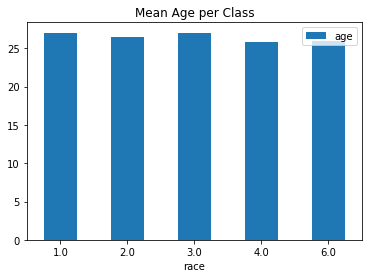

In [66]:
avg_age_by_class = df.pivot_table('age', index='race')
avg_age_by_class.plot(kind='bar', title= 'Mean Age per Class', rot=0)

In [67]:
df.groupby('career_c')['age'].agg({'mean'})

,mean
career_c,
1.0,24.354077
2.0,26.789019
3.0,24.338624
4.0,26.658065
5.0,24.813665
6.0,26.650699
7.0,27.315685
8.0,27.285714
9.0,26.325700


In [68]:
df.groupby('gender')['age'].agg({'mean'})

,mean
gender,
0,26.087530
1,26.587125


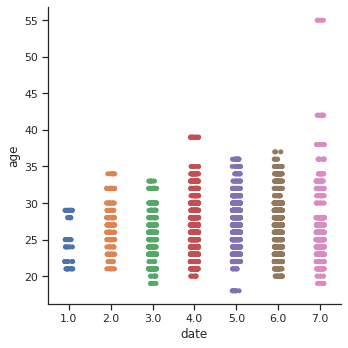

In [69]:
# date and age
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="date", y="age", data=df)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


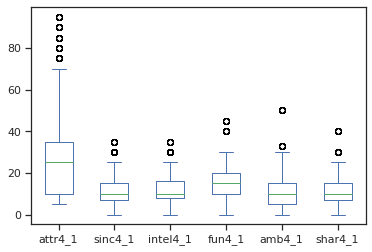

In [70]:
df[['attr4_1','sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1','shar4_1']].plot(kind='box')

In [71]:
# check missing values
df['match'].isnull().sum()

0

In [72]:
y= df['match']
df.drop('match', axis=1, inplace=True)

###building Pipeline

### Trial 1
I have tried to get rid of columns with more than 75% missing values and imput the rest columns with most frequent values in thier columns 
and I have used RandomForestClassifier as it is good at high dimensional data 

In [73]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.decomposition import PCA 


# replace with most_frequent from training set
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())
        ]
)
col_df = df.select_dtypes(include=np.number).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, col_df)])

full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           RandomForestClassifier(),
        )
    ]
)


In [74]:
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['gender', 'condtn', 'wave', 'round', 'position', 'order', 'partner',
       'int_corr', 'samerace', 'age_o',
       ...
       'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2',
       'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2'],
      dtype='object', length=113))])),
                ('my_classifier', RandomForestClassifier())])

In [75]:
full_pipline = full_pipline.fit(df, y)
full_pipline.predict(test)

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [20, 30, 40],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[10, 20, 30]       
}

# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(df, y)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
best score 0.8448586583399094
best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


#### Trial 2

I would use the same model, the same parameters and range of these 

parameters' values but changing imputer strategy to most frequent  

In [77]:
param_grid_most = {
    'preprocessor__num__imputer__strategy': ['most_frequent'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [20, 30, 40],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[10, 20, 30]       
}

# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search_most = GridSearchCV(
    full_pipline, param_grid_most, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search_most.fit(df, y)

print('best score {}'.format(grid_search_most.best_score_))
print('best score {}'.format(grid_search_most.best_params_))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
best score 0.8455417146971373
best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'most_frequent'}


### Trial 3

using different model XGBoost, as random forest did a good job 

but I think XGBoost maybe perfrom even better and using 5 fold instead of 2

[XGBoost & Hyper-parameter Tuning](https://www.kaggle.com/rohansadale/xgbclassifier-and-randomforest-in-python)

In [78]:
from xgboost.sklearn import XGBClassifier

In [79]:
xgb_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(),
        )
    ]
)

In [80]:
xgb_param = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__learning_rate': [.001, .01, 0.1],
    'my_classifier__n_estimators': [40, 100, 500],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[10, 20, 30]       
}

# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search_xgb = GridSearchCV(
    xgb_pipline, xgb_param, cv=5, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search_xgb.fit(df, y)

print('best score {}'.format(grid_search_xgb.best_score_))
print('best score {}'.format(grid_search_xgb.best_params_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
best score 0.8810633633508843
best score {'my_classifier__learning_rate': 0.1, 'my_classifier__max_depth': 30, 'my_classifier__n_estimators': 500, 'preprocessor__num__imputer__strategy': 'mean'}


In [81]:
print('best score {}'.format(grid_search_xgb.best_score_))
print('best score {}'.format(grid_search_xgb.best_params_))

best score 0.8810633633508843
best score {'my_classifier__learning_rate': 0.1, 'my_classifier__max_depth': 30, 'my_classifier__n_estimators': 500, 'preprocessor__num__imputer__strategy': 'mean'}


#### Trial 4

using random search, it is faster than grid as it didn't take that much time to run the model and fit.

 it is good in the production level because you don't always want the best parameters but the business may need a faster algorithms that perform well enough

In [82]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit

Random_search = RandomizedSearchCV(
    full_pipline, param_grid, cv=5, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

Random_search.fit(df, y)

print('best score {}'.format(Random_search.best_score_))
print('best score {}'.format(Random_search.best_params_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


best score 0.8551723667238
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 40, 'my_classifier__max_depth': 10}


#### Trial 5

random search with xgboost classifier

In [83]:
Random_search = RandomizedSearchCV(
    xgb_pipline, xgb_param, cv=5, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

Random_search.fit(df, y)

print('best score {}'.format(Random_search.best_score_))
print('best score {}'.format(Random_search.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score 0.8758974813031234
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 500, 'my_classifier__max_depth': 10, 'my_classifier__learning_rate': 0.01}


#### Trial 6

We can interpret the hyperparameter search problem as a non-differentiable optimization problem,

and use bayesian learning to predict what is the next hyperparamter values we should try given the current trials

In [84]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.0 MB/s 


[auto_tune](https://colab.research.google.com/drive/1jGn01X6OiF8JKfq_wArn74QVxyGQwnOt#scrollTo=y-JZz-bTi2jV)

In [85]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC


SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced'))
    ]
)
# SVC has a class_weight attribute for unbalanced data


# define ranges for bayes search
bayes_search = BayesSearchCV(
    SVC_pipline,
    {
        'my_svc__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'my_svc__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'my_svc__degree': Integer(1,8),
        'my_svc__kernel': Categorical(['linear', 'poly', 'rbf']),
    },
    # number of trials 
    n_iter=2,
    random_state=0,
    verbose=1,
    # we still use 
    cv=2,
)

bayes_search.fit(df, y)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
best score 0.8304279837370991
best score OrderedDict([('my_svc__C', 0.0012602593949011189), ('my_svc__degree', 8), ('my_svc__gamma', 2.285959941576884), ('my_svc__kernel', 'poly')])


#### Trial 7

In [87]:
from skopt import BayesSearchCV

# define ranges for bayes search
bayes_search_xg = BayesSearchCV(xgb_pipline, xgb_param,
    # number of trials 
    n_iter=10,
    random_state=0,
    verbose=1, n_jobs=2,
    # we still use 
    cv=2,
)

bayes_search_xg.fit(df, y)

print('best score {}'.format(bayes_search_xg.best_score_))
print('best score {}'.format(bayes_search_xg.best_params_))


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
best score 0.8646134124253786
best score OrderedDict([('my_classifier__learning_rate', 0.1), ('my_classifier__max_depth', 30), ('my_classifier__n_estimators', 100), ('preprocessor__num__imputer__strategy', 'mean')])


###how you reach the final design?

I had started exploring the training data then preprocessing by dropping or changing columns data type.

 building a Pipeline that imput missing data and then standardize data then
 
fit it to the desired model after building
 the model try to tune it with different parameters

##Q1 Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

Linear Regression deals with continuous values whereas classification problems mandate discrete values 

##Q2  What's a decision tree and how it is different to a logistic regression model?



Decision Trees bisect the space into smaller and smaller regions, whereas Logistic Regression fits a single line to divide the space exactly into two

##Q3  What's the difference between grid search and random search?

Grid Search can be thought of as an exhaustive search for selecting a model. In Grid Search, the data scientist sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data. In this approach, every combination of hyperparameter values is tried which can be very inefficient

Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score

##Q4  What's the difference between bayesian search and random search?

bayesian search  takes less training steps in order to achieve a comparable result as compared to random search with a sufficiently high number of experiments